<a href="https://colab.research.google.com/github/ESLAMYASSER-1/Pytorch_learning_Daniel_Bourke/blob/main/Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y= weight *X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

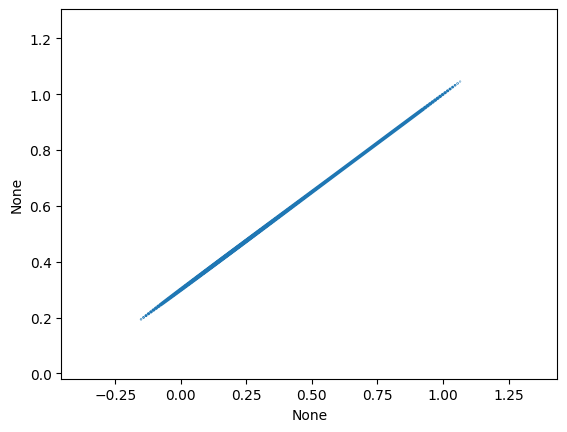

In [11]:
sns.kdeplot(x=X.squeeze(), y=y.squeeze())
plt.show()

In [12]:
X_train, y_train = X[:40], y[:40]
X_test, y_test = X[40:], y[40:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [13]:
def plot_predictions(X_train = X_train, y_train=y_train, X_test=X_test, y_test=y_test, predictions=None):
  plt.figure(figsize=(10,7))
  sns.scatterplot(x=X_train.squeeze(), y=y_train.squeeze(), label="Training Data", color="blue")
  sns.scatterplot(x=X_test.squeeze(), y=y_test.squeeze(), label="Testing Data", color="red")
  if predictions is not None:
    sns.scatterplot(x=X_test.squeeze(), y=predictions.squeeze(), label="Predictions", color="green")
  plt.legend()


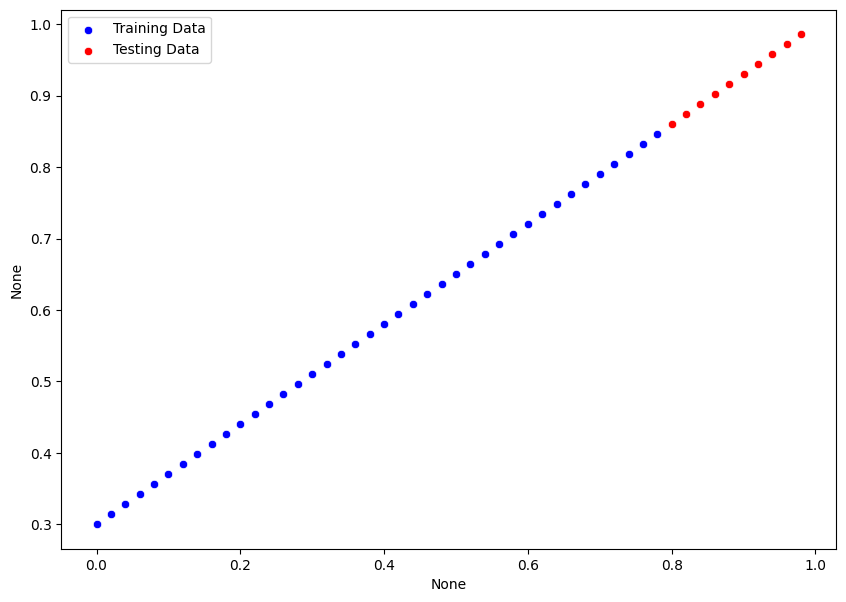

In [15]:
plot_predictions()

In [96]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad =True,
                                            dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad =True,
                                         dtype= torch.float32))
  def forward(self, x:torch.Tensor)-> torch.Tensor:
    return self.weight * x +self.bias

In [97]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [98]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [99]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [100]:
with torch.inference_mode():
  pred_y = model_0(X_test)
pred_y, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

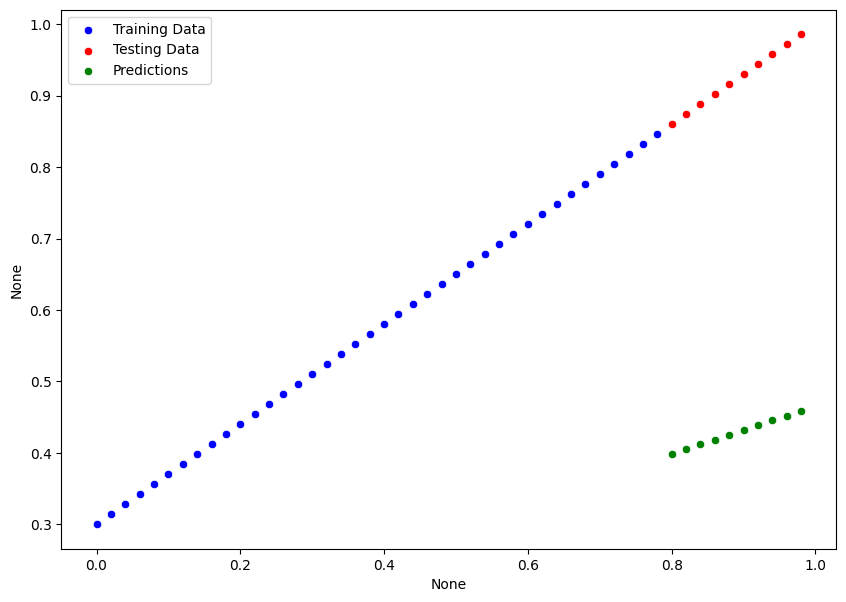

In [101]:
plot_predictions(predictions=pred_y)

In [217]:
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.02)

In [218]:
criterion, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.02
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [219]:
with torch.no_grad():
  print(list(model_0.parameters()))

[Parameter containing:
tensor([0.5793], requires_grad=True), Parameter containing:
tensor([0.3506], requires_grad=True)]


In [235]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [236]:
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.008)

In [237]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [238]:
epochs = 251

epoch_count= []
loss_values= []
test_loss_values= []


for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = criterion(y_train, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.no_grad():
    y_pred_test = model_0(X_test)
    loss_test = criterion(y_test, y_pred_test)
  if epoch%10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss.detach().numpy())
    test_loss_values.append(loss_test.detach().numpy())
    print(f"Epoch: {epoch} | Loss: {loss} | Test_Loss: {loss_test} \nModel Parameters: {model_0.state_dict()}")

Epoch: 0 | Loss: 0.31288138031959534 | Test_Loss: 0.48375940322875977 
Model Parameters: OrderedDict([('weight', tensor([0.3398])), ('bias', tensor([0.1368]))])
Epoch: 10 | Loss: 0.2207133024930954 | Test_Loss: 0.3759912848472595 
Model Parameters: OrderedDict([('weight', tensor([0.3710])), ('bias', tensor([0.2168]))])
Epoch: 20 | Loss: 0.1285453587770462 | Test_Loss: 0.2682233452796936 
Model Parameters: OrderedDict([('weight', tensor([0.4022])), ('bias', tensor([0.2968]))])
Epoch: 30 | Loss: 0.06757356226444244 | Test_Loss: 0.18282301723957062 
Model Parameters: OrderedDict([('weight', tensor([0.4321])), ('bias', tensor([0.3556]))])
Epoch: 40 | Loss: 0.05078066512942314 | Test_Loss: 0.13714845478534698 
Model Parameters: OrderedDict([('weight', tensor([0.4560])), ('bias', tensor([0.3800]))])
Epoch: 50 | Loss: 0.04544750601053238 | Test_Loss: 0.11440803855657578 
Model Parameters: OrderedDict([('weight', tensor([0.4744])), ('bias', tensor([0.3864]))])
Epoch: 60 | Loss: 0.0423608310520

In [239]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6968])), ('bias', tensor([0.3048]))])

In [240]:
with torch.inference_mode():
  y_pred_new= model_0(X_test)

In [241]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6968])), ('bias', tensor([0.3048]))])

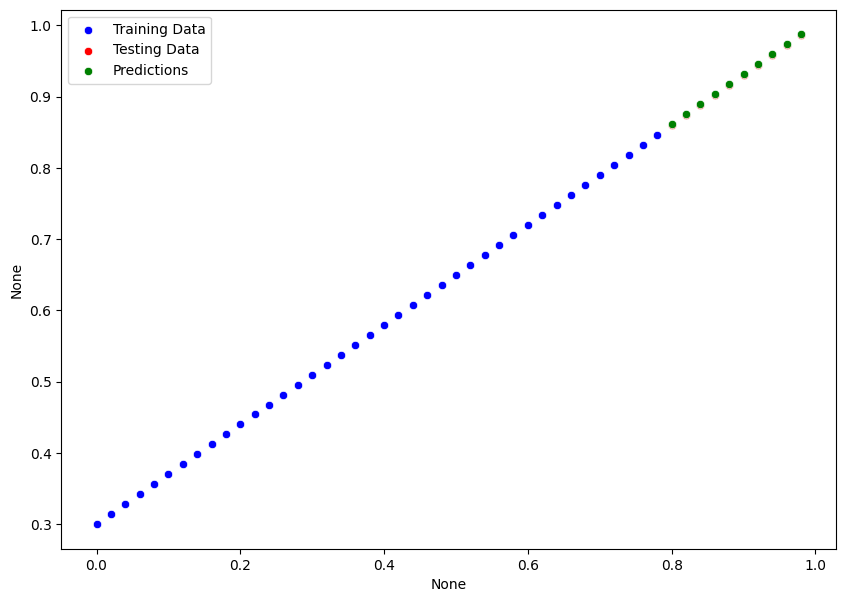

In [242]:
plot_predictions(predictions=y_pred_new)

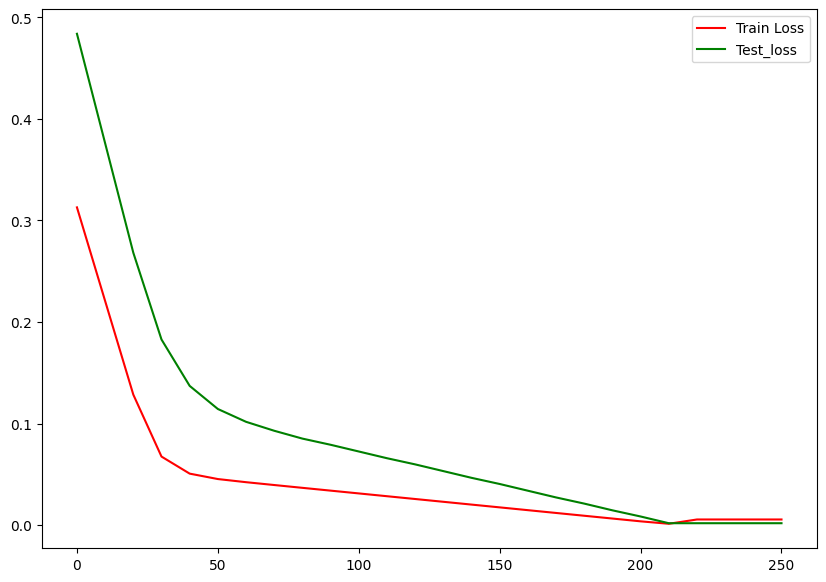

In [249]:
plt.figure(figsize=(10,7))
plt.plot(epoch_count, loss_values, color="red", label="Train Loss")
plt.plot(epoch_count, test_loss_values, color="green", label="Test_loss")
plt.legend()